In [2]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.6.0


In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(config_file,frozen_model)

In [5]:
classlabels = []
file_name ='labels.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classlabels)    
print(len(classlabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0000015E2ED08D30>

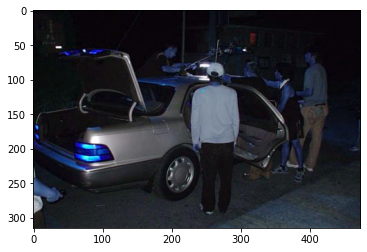

In [8]:
img = cv2.imread('low light.jpeg')

plt.imshow(img)

In [9]:
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex,confidece,bbox = model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[1 1 3 1 1]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

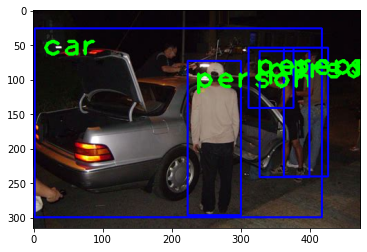

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
cap = cv2.VideoCapture('demo video.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("cannot open video")

font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex,confidece,bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                 cv2.rectangle(img,boxes,(255,0,0),2)
                 cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                 
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break     
    

cv2.destroyAllWindows()         


[3]
[3]
[3]
[3]
[3]
()
()
()
()
[3]
[3]
[3 3]
()
[3]
()
()
()
()
[3]
[3 3 3]
[3 3 3]
[3 3 3]
[3]
()
[3]
[3]
[3 3]
[3]
[3 3 3]
[3 3 3]
[3]
[3 3]
[3 3]
[3]
[3 3]
[3 3]
()
()
[3]
[3]
